# Goal of the project

The goal of this project is to control a 2D quadrotor to perform acrobatic moves. There are 4 parts of the project, where you will build controllers of increasing complexity. The last part will lead to the implementation of the iterative LQR (iLQR) algorithm.

## Instructions
Answer all the questions in the 4 parts below. You will need to submit:
1. A report (pdf format only - every other format will be rejected) answering all the questions that do not request code. DO NOT include code in the report.
2. One (or several) Jupyter notebook(s) containing all the code used to answer the questions. The notebook(s) should be runnable as is.

## 2D quadrotor

The quadrotor is depicted in the following figure <img src='quadrotor.png' width="300">
The quadrotor model is written as
$$\begin{align} 
\dot{x} &= v_x\\
m \dot{v}_x &= - (u_1 + u_2) \sin \theta \\ 
\dot{y} &= v_y\\
m \dot{v}_y &= (u_1 + u_2) \cos \theta  - m g\\
\dot{\theta} &= \omega\\
I \dot{\omega} &= r (u_1 - u_2) \end{align}$$
where $x$ is the horizontal and $y$ the vertical positions of the quadrotor and $\theta$ is its orientation with respect to the horizontal plane. $v_x$ and $v_y$ are the linear velocities and $\omega$ is the angular velocity of the robot. $u_1$ and $u_2$ are the forces produced by the rotors (our control inputs). $m$ is the quadrotor mass, $I$ its moment of inertia (a scalar), $r$ is the distance from the center of the robot frame to the propellers and $g$ is the gravity constant. To denote the entire state, we will write $z = [x, v_x, y, v_y, \theta, \omega]^T$ - we will also write $u = [u_1, u_2]^T$.

The module ```quadrotor.py``` defines useful constants (mass, length, gravity, etc) and functions to simulate and animate the quadrotor as shown below.

## Part 1 - Setting up
1. Discretize the system dynamics using the method seen in class - write the time discretization step as $\Delta t$ (use symbols not numbers for the mass, etc)
2. Assume that the robot starts at an arbitrary position $x(0) = x_0$, $y(0) = y_0$ and $\theta(0) = 0$ with 0 velocities. Compute $u_1^*$ and $u_2^*$ such that the robot stays at this position forever after (you may test your answer using the simulation below).
3. Analyzing the system dynamics, is it possible to move in the x direction while keeping $\theta = 0$? Explain why.
4. Analyzing the system dynamics, is it possible to have the system at rest with $\theta = \frac{\pi}{2}$ (i.e. have the quadrotor in a vertical position)? Explain why.

## Part 2 - LQR to stay in place
Now that we have $u^*$ capable of keeping the robot at rest, we can design a simple controller that ensures that the robot stays in place even when pushed around by random disturbances (e.g. due to the wind). Our task here will be to design a LQR controller that keeps the robot at a predefined position. Since the dynamics is not linear, we need to compute a linear approximation of it.
1. Linearize the dynamics at an arbitrary operating point $z^*$, $u^*$ and write the linearized system dynamics using the variables $\bar{z}_n = z_n - z^*$ and $\bar{u}_n = u_n - u^*$.
2. Write a function ```get_linearization(z, u)``` that returns the matrices A and B given a state $z$ and a control $u$ (use the constants defined in the ``quadrotor.py`` module).
3. Using the linearized dynamics, we can design an infinite horizon LQR controller of the form, $\hat{u} = K \bar{z}$ to stabilize the resting point. Write the equations of the controller in the original coordinates $u$ as a function of $z$.
4. Design an infinite-horizon LQR controller that stabilizes the origin $z=0$ and test it using the simulator below.
5. Explain your intended design in the report, including the cost function and found control law. In particular, verify that it can handle perturbations by calling the ```simulate``` function with ```disturbance = True``` (when setting disturbance to ``True``, the simulator will generate a random perturbation every 1 second). Simulate your controller for 10 seconds, plot the state evolution and show the animation (include the plots in your report).

## Part 3 - following a trajectory using linearized dynamics
Now we want to follow a given trajectory leveraging a linearized version of the dynamics to design LQ controllers.
1. Assume that we want to follow a circle of radius 1 centered at (0,0) while keeping an orientation $\theta=\frac{\pi}{4}$, how does the linearization of the dynamics change along the desired trajectory? Why?
2. Design a tracking controller (using an LQ design with linear approximations) to follow this desired trajectory. Explain your design in the report. 
3. Test the tracking controller with the simulation (with and without the perturbations) and verify that you can indeed track the (x,y) trajectory very well. Are you able to also track $\theta$? (Explain) 
4. Analyze your results (including plots of the states, controls, etc). What benefits and issues do you see with this approach?
5. Answer questions 1-4 with a desired orientation of $\theta = 0$

## Part 4 - iterative LQR
Now we would like to do more complicated motions with the robot, like a flip. In this case, we do not have a prescribed trajectory but we would like to compute a locally optimal trajectory while we optimize the controller. We will use the *iterative LQR* algorithm to solve this problem.
### Task 1 - reaching a vertical orientation
In the first task, we want the robot to reach a vertical orientation $\theta = \frac{\pi}{2}$ at the location $x=3$ and $y=3$ at time $t=5$ starting from $z_0=0$. During the rest of the motion, the robot should try and stay close to the origin. It should also try to keep its control $u$ close to the control needed to keep the robot at rest. We want to make sure the robot reaches the origin $z=0$ at the end of the movement. 
1. Find a time-varying cost function that promotes such a behavior (use only quadratic/linear terms for simplicity). Assume $T=10$ seconds.
2. Write a function ```compute_cost(z,u, horizon_length)``` that returns the cost of a trajectory z with control trajectory u (using the cost function you wrote in question 1).
3. Compute the quadratic approximation of your cost function along an arbitrary trajectory of states $z_n$ with control trajectory $u_n$ (this is not just your cost function!)
4. Write a function ```get_quadratic_approximation_cost(z, u, horizon_length)``` that returns the quadratic approximation (Hessian matrices and Jacobians) of the cost function when approximated along the trajectory z with control trajectory u.
5. Write the iLQR algorithm that solves the problem using the functions written above. DO NOT FORGET the line search step at each iteration. For the line search, start with $\alpha = 1.$ and decrease it by half when the cost does not improve (you can stop when $\alpha < 0.01$).
6. Test the algorithm using as initial guess $u$ such that the robot is at rest (using the results of Part 1.2). Analyze your results (probably you will need to "tune" your cost function), plot the initial and final state and control trajectories, show the animation. Use the simulation without perturbations for simplicity. 
7. What benefits and issues do you see with this approach?
### Task 2 - doing a full flip
In the second task, we want the robot to do a full flip, trying to reach the upside-down state $x=1.5$, $y=3$ and $\theta = \pi$ at $t=5$ and upright state $x=3$, $y=0$ and $\theta = 2\pi$ at $T=10$.
8. Use iLQR (and a new cost function) to get the quadrotor to perform the task. Analyze your results. 
9. What benefits and issues do you see with this approach? Could you run the resulting controller on a real robot?

In [67]:
%matplotlib inline 
#%matplotlib notebook  #uncomment for Jupyter
#%matplotlib inline     #uncomment for VSCode

import numpy as np
import matplotlib.pyplot as plt
#from numpy import sin, cos, pi
import quadrotor
import sympy as sym

from sympy.utilities.lambdify import lambdify

In [68]:
# we can get its mass, half length (r), gravity constant
print(f'm is {quadrotor.MASS}')
print(f'r is {quadrotor.LENGTH}')
print(f'I is {quadrotor.INERTIA}')
print(f'g is {quadrotor.GRAVITY}')

# we can also get the integration step used in the simulation
print(f'dt is {quadrotor.DELTA_T}')

# we can get the size of its state and control vector
print(f'number of states {quadrotor.NUMBER_STATES} and number of controls {quadrotor.NUMBER_CONTROLS}')
print('the states are indexed as follows: x, vx, y, vy, theta, omega')

m is 0.6
r is 0.2
I is 0.15
g is 9.81
dt is 0.01
number of states 6 and number of controls 2
the states are indexed as follows: x, vx, y, vy, theta, omega


In [69]:
# we can simulate the robot but we need to provide a controller of the following form
x,V_x,y,V_y,theta,omega,u1,u2 = sym.symbols('x V_x y V_y theta omega u1 u2')
dt=quadrotor.DELTA_T
mass=quadrotor.MASS
Len=quadrotor.LENGTH
Inertia=quadrotor.INERTIA
grav=quadrotor.GRAVITY


np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

def get_linearization(z,u):
        # Description
        dt=quadrotor.DELTA_T
        mass=quadrotor.MASS
        length=quadrotor.LENGTH
        Ine=quadrotor.INERTIA
        grav=quadrotor.GRAVITY

        #_______________________
        x     = z[0]
        V_x   = z[1]
        y     = z[2]
        V_y   = z[3]
        theta = z[4]
        omega = z[5]

        u1 = u[0]
        u2 = u[1]
        #________________________

        #_________________________________________________________replace 1 and 2
        #z_next=quadrotor.get_next_state(z,u)
        #_____________________________________________________________replace 1 and 2

        #__________________________________1
        # Continuous Dynamics for Quadrotor in Symbolic
        A_pseudo = sym.Matrix([[V_x],[0],[V_y],[-grav],[omega],[0]])
        B_pseudo = sym.Matrix([[0],[(-sym.sin(theta)/mass)*(u1+u2)],[0],[(sym.cos(theta)/mass)*(u1+u2)],[0],[(length/Ine)*(u1-u2)]])  
        dzdt=A_pseudo+B_pseudo
        dzdt_T=dzdt.T
        #___________________________________1
        
        #___________________________________2
        # Discrete Dynamics for Quadrotor in Symbolic
        z_n_T= z.T
        z_next = z_n_T + (dt*dzdt_T)
        #___________________________________2

        #___________________________________3
        # Jacobian from the Discrete Dynamics in Symbolic and Numeric
        A_sym = z_next.jacobian(z)
        B_sym = z_next.jacobian(u)
        A_num = lambdify((x,V_x,y,V_y,theta,omega,u1,u2),A_sym,'numpy')
        B_num = lambdify((x,V_x,y,V_y,theta,omega,u1,u2),B_sym,'numpy')
        #____________________________________3

        return A_num,B_num

#make A,B,K global
z_n = sym.Matrix([[x],[V_x],[y],[V_y],[theta],[omega]])
u_n = sym.Matrix([[u1],[u2]])
A_out,B_out=get_linearization(z_n,u_n)


def dummy_controller(state, i):
    """
        the prototype of a controller is as follows
        state is a column vector containing the state of the robot
        i is the index corresponding to the time step in the horizon (useful to index gains K for e.g.)
        
        this controller needs to return an array of size (2,)
    """

    def solve_LQR_trajectory(A, B, Q, R, x_bar, N):
        """
        A, B, Q and R are the matrices defining the OC problem
        x_bar is the trajectory of desired states of size dim(x) x (N+1)
        N is the horizon length

        The function returns 1) a list of gains of length N and 2) a list of feedforward controls of length N
        """
        K_gains = []
        k_feedforward = []
        for i in range(0,N+1):
            if i == 0:
                PN=Q
                P=PN
                qN=-Q@x_bar[:,N-i] #N-i, allows us to start from the begining(N-i) and end at 0
                p=qN

            else:
                #Initializing transposed arrays
                BT=np.transpose(B)
                AT=np.transpose(A)
                #Initializing variables for clean code
                qn=-Q@x_bar[:,N-i] #N-i, allows us to start from the begining(N-i) and end at 0
                Y=-np.linalg.inv(R+(BT@P@B))
                Z=AT@P@B

                #Main meat
                K_n = Y @ (BT@P@A)
                P_n = Q + (AT@P@A) + (Z@K_n)
                k_n = Y @ (BT@p)
                p_n = qn + (AT@p) + (Z@k_n)

                #for the next iteration
                P = P_n
                p = p_n

                #Stores the values in front, thereby bypassing .append and .reverse
                K_gains.insert(0,K_n)
                k_feedforward.insert(0,k_n)
        return K_gains, k_feedforward

    u_n1=np.zeros(2)
    u_n1[0]=mass*grav*0.5
    u_n1[1]=mass*grav*0.5
    A=A_out
    B=B_out
    A1 = A(state[0],state[1],state[2],state[3],state[4],state[5],u_n1[0],u_n1[1])
    B1 = B(state[0],state[1],state[2],state[3],state[4],state[5],u_n1[0],u_n1[1])
    Q=np.eye(6)*100
    R=np.eye(2)*0.01
    N=1000

    #____________________________ z_bar
    t = np.arange(0.,10.01, dt)
    N1 = len(t)-1
    omega1 = 0.5*np.pi

    for ii in range(N1+1):
        omegaT=omega1*t[ii]
        z_bar1 = np.array([[np.cos(omegaT)],[-omega1 * np.sin(omegaT)], [np.sin(omegaT)],[omega1 * np.cos(omegaT)],[0],[0]])
        if ii == 0:
            z_bar=z_bar1
        else:
            z_bar = np.hstack((z_bar,z_bar1))
    #_________________________________

    K_gains,k_feedforward = solve_LQR_trajectory(A1,B1,Q,R,z_bar,N)

    x_n=state.reshape(len(state),1)
    #x_n=z_bar[:,i]
    #print(z_bar[:,i].shape)
    #print(x_n)
    #K_n=K[i][:][:]   #Initializing necessary variable to store K_n
    K_n=K_gains[i]
    k_n=k_feedforward[i]
    k_n=k_n.reshape(len(k_n),1)
    u_n=(K_n @ x_n) + k_n #Formula from Prof L. Righetti
    u=u_n.reshape(len(u_n),) #reshape of u/u_n to allow for stacking

    # here we do nothing and just return some non-zero control
    return u




# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
t, state, u = quadrotor.simulate(z0, dummy_controller, horizon_length, disturbance = False)

Text(0.5, 0, 'Time [s]')

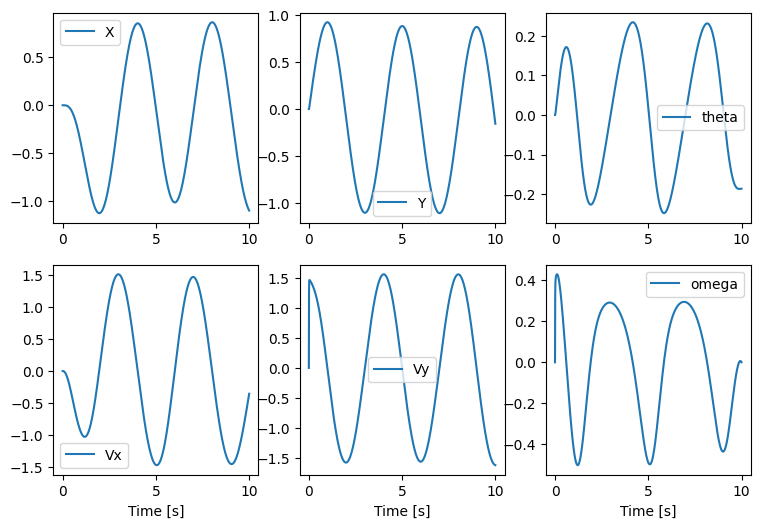

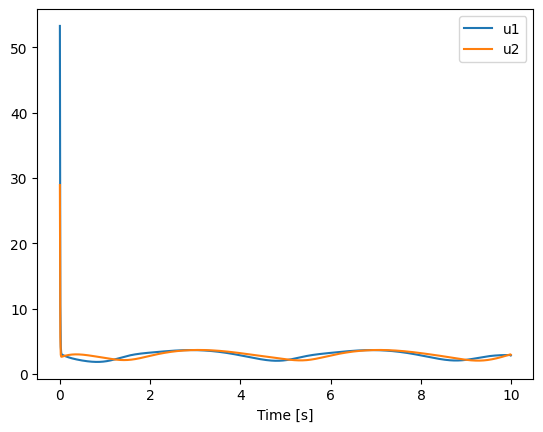

In [70]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

In [71]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAhNVtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI3
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EwFliIQAP//+92ifAptaQ3qA5JXFJdtPgf+rZ3B8j+kDAAADAAADAAADAAB1oWGAKYNX0WHAAAAD
AAmgAVAAowCUgKmhHu/ifulxAQcwg58Gg9IQ//ND6pvzvVm0S1gLeifirHZOZuMa+DWBSERwDJuK
Rls1wwiJr4cof7z2cZAmI629h/13RClUxSw2nWg78hfTSbAu/R33AELAxpF7tz+7C/Wc42llJd7/
jv5/5eyIvbVaeliyk24erZdh5JiZfSMmPlin8lZoaDeZVoIFfNLV0B+RvVg9N/oaI3qY3rh/eida
Al3Gi14ub56yDcIAk2CCtI4ygVRpEaiQyJpGS8sDimLBPq8YKec1+MfgMDjRhPBSoas+Aj8CjcvV
M2MKYUr9QTodafJePeP1etcGE2uUr2Y9LJYU1a6c5h9D/BrJuuk+dyypTVqWVFSMibVjKAC9MW6l
ECIMouTPcIcyHY5QCVik4VHbOSY5AjTyk1HCtCRAY15fjHMHfj9FucwFQAEEAAAEaVoMnzvoz8Ze
2jxHsdyww/lwIPhYZj9cr/sCzDGA1JXOpktMzUsr2rKk2ZDKOAW5ayX7+OPXXeNVyPAf6cl+QoDD
6XmjYBLS5p2thcV6nvSE56tcwW0qgnT7Bkr/3EgFlC2Gmcq9VVEMzSTnjDNi13TNYmkTjaMClYZr
pYzoHejY2u3pMNP/q6PSJQbiA8VzfdY30q2gf0DHsVXRKw3GSam1DkB3jZwwE6vysr57I39hBcdp
xEnQi97R/1J34x6EpF5vGwb3Z0WP9ng1nzHcZNPdPl5nmhYqn3Emb9/tHaf1TUlft4MWLhnZchpo
8kk7V1rA89/axfRKDwC7UViR+Hd/DN0iXmPdPs+yhRzorcEtANHXTyOiKu+AKBG5ykWbCJ85PQoH
+x3IRc3iyLcLia0HLJ1k11k+F5HKec7CFUekAAADAAADAAADAFjVvPIgcWhVsvilr663n+rhBkBe
SFGztpSnT2jJUsAORt8xQItL/Fwxobzk4bZxHzub5HKRLTUCtQ2Ib4YBngCK78jyQA2PJKQq9rbt
Dbm3SSR9hkfYcri6Q///sHDGxhp7bgCkE63yZ6K3xuXawlhNdimeuV2IQrH6oAR/JND6JnzNjm+G
kN3lMa0drcNMUtAFOgSGtv44IO2yWhL0J5d6z9/wdLEcsb4X0Tv/WZUZqcYOMt0dPz3R0oiW3il9
nBhXs8r7fV7Ae9VKtfLk+9C0L85+dPH/zMwPBuYBbW4urdj+ulLbgIq2XihC/ywl3DSKTqAAQ5bZ
u0KfsuSyYhAT/zHTHgmH4qjqkU2JPjI5CAjz/CReKCWzUYw/7JKO5ccuICLrOEC7jnfnz6JGzuPz
gyWQ4fDACa0k9uPVxCEIPd56+GV1+6n6wO7p9PKDs+vfmVM/37XhZeLqXETGqoNy6wx/hOJJ9dx8
dnVPJOt1Uv9zAGZjv45Twp4wBbBwDUgADI2xw0Vs91OxT289T2+1ubwQTZt2kNlLxSLwAALk/3Wv
yanKfvebTqEfTeecUKAACwlsgBvmrQE7cNwuuqFKI9GrNwi9ZZk8YrFRsC7ri46GGMJAK8i13abQ
kUV90wCAVu/PPcL8zntuzW3W58JmNNOv1HSL7STbkD88reHbG0SCuD+tru/R0UFRa4zRv9V5ufXZ
uJvRyBf41FL5METEQSMLx1otNjGrA8qOmMImNsFPz8ifL5k1gvA6MZ0jUFCxoMkN3U0s4Q/SKIQZ
5nJejycC51nrSeNGBznis5UO7KD76a8SaBXwZ4+BirlH3Sn8VsrNyuVGkGFOvZkMv06cL0fcZ8r+
nqZAlU1s41YQBKzs7c8CJRva4Dv3rREqw6m4tna3Fg1Ng7+jS2rrGw+zAt1dC2P//8wwovTnlk3W
ojqb7cB23nEMqk7mBw2lFL7PWty9A7tT3JZNuUCsed1M9JUlH2Lo3V3dnP6uFjy6ElHJwbTr3rpx
n8RRsToSWnzXXNo/LeuBdiLJt2RKMyPzhKUU+TgaUOsuwojR2vVAN+vE+7+L3/HdAV8V/weBAboh
pDm9lojrk9w5plaNGdJME6PBgmbboephKnNKBRsUJ1bvQwy9J5mCzYAAAAhYBu/K0RHMMhkGBXVt
7EMouCsNgCK8YP/o8PzGgEyDV24d3kr669aDnwEXZSZi7W004j99oP+iz98OeojCgZEmfucjZQMa
QY2hP53Rd/0p2hROsZvI6zCNRy+qrIX4zWfGN+aUso6jTOIAXB3XYWExg6f9oEA7fvDP/kCFb8iH
XVpLLcnFjsbqMX0qu6G7fE+Ukk9BTI5TFJ8VyWqYV9Pk0Fycx8b9nK19g0t2xx8eoSBBhczyf82i
2IwyVTXSjhXUblwMun6jUsz7JJM7vy7U0tPWdKdQ5uS8yB51AYQtEiU167Q15ylKPL+rlnzWw4dH
ty9ELGy53809/D+GTUnyQ+Pcal37/yR8C89ucKDWswgvZ7EW3gzlqyIYAmbihdlA1Qd3+J856Iol
xG4yBZtafrbic/P+0j6xm+LGy5pzeuockGcVb0/nGncHNdhmHVHgaRjKwwSzfz/drwuwomtyFD9I
HuOCmMvLYgxEJT1YQHY8BakgHf/ftKS3t/Y+S1sWXSV0y2OEVz0aowHvJvB20Hkr0s2ntXWnvJfP
E85DkL/KSaF0Odm+Qq4NO27d2qzE99daGWFY0+/VB3gaoExB8zdqUjuATne474/geiYfIMec6UGA
G7jWO5sW0Dqi3bPphqbc1BNURUTnpYOedFhOlDU2jMVSfOK4EFA/owc8OLOnOSg5Pnkf227j7MPP
ZOJpzHNtOXPdzNjSODZXBIHH2ORne4H9qQA+1km/pyR43XEZHOQSjZvXrvdf8sdLsdQYH7YTuydV
2pJz+qZK0fBVpFE9GTw+I

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAhv5tZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI3
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EuhliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwAAAwAGIxI3/ofxeM38AAAD
AAC3ABhQDCAKqAwqKe7+J+6nEAthk3z4NEVsiXDWZ2SIPprNolrAW9coFIQGQQogk1usCkk7gKLc
UjLZrhejXtCUcPUjlbYcy+yu9JWQjvWkunAVPdeDvyF9tLxVjIpotabFMJTVobn7sNL/ZmIE+0nq
+5i//d/tW8x5j/WWUm3D1th34Lb/lqRonpS6jyVmhoQZvIVAmDgcDuo5PlWD03+vw7tYq99Z+y+b
HyReNFrxo3z2EA4QBJsEFaRxlAqjSg1ElkVWMl5YHFMWMPV44U8/r8e+gYHGjCeClaVZ8BH4FG5x
ZyMVawOWNA5VO60rLIJ0BNa4MKPioVmT2x1L0gHYcZ1oT+thVmulCoT81aUJXAvMWxJVeFoyHDIq
UgdhcLMjnuEI1DscoBKxMNQGowA6ZDRouNEvioND2eegP2dAdSAfT+fMBUABBAAABGmKDJ876NGy
3afIgZxOWGH8uBB8S+xdbxxx7aX8VK9Ne/JLTM1LK9qyzHmQyjgFuWsl+/jj12ljVcjwH+nJfkKM
xLlvg2AS0uadrYXPrhrA85n7AX+r9rBrT8vv7QrrzFRthqXqw1VQbM0mhcwzYtd0zWJpE42lApWG
a6WM6B3o2NsB6TDUv8pHChWpjkEP9W3WQ9MNoH9Ax7FV0SsNx0mptQ5Ad44cMBNXlq3nAG09tBnl
ngm/qEf3ab+tO/GPQlIwN42Di7Oix/s8Gs+Y7jJp7p8vNE0LFVO4lDfv/I7T+qakr9vBixcN7Lkt
NHkUpawtZnnv7WL6JQeAXaisSXw7v8dukU8x7Z9n2UKOdFbglpBo67eR0RW3wDQIyOUizYRPnJ6F
A/2e5CLm8WRbhcTWo5ZOsmqsnwvI5Tzmy3u12IAAAAMAAAMAABY17zyLJlotbL4pa+ut6Am9z7Z3
VYFsAZB0zAOIfpbkkHUXu9lPfi4Y0N60cNtHYTaPudX+ja2RH1tAi+kQAu52/cPl6zwFjxSkKva2
7Q25t0kkfYZHeHK4ukP//7BwxsYae24ApBOt8mOit8bl2sJYTXYpnqldiEKx+qAEfyTQ+iZ4zY5v
hpDd5TGtHa3DUFLQBLoEhjb+OCDtsloS9CeWes/f8HSxHLG+F9E7/12VGanGDjLcTSB9iccRlN81
Qjgwr2eV9vq9gPeqlVfna2djaF+c/Onj/5mYHg3MAtrcXVux/XUltwEVbLxQhf5oS7hpFJ1AAIct
s3aFP2XJZKHhqibkPKp5R+Ko6pFNiT4yOQdzgmNTfVFmAzCpPBA+7ouOXEBF1nCBdxzxz59EjZvH
5wZLIcPhiUrLPH15Yhf03mmawqYMdt4DvejqCSBH8AQVvNoZ/vvKTF1ryUK1bbKOvcFdtDiX/+6f
Uofqu+fZG2wzUhjh0eGd/qe93SI1TgCQUGiZUDe6nI57d1yqwPrxqF5nwH6q4t3dXYAAHGDH+8bW
XUjzH3nza87RAAAHluGgHYatATlw2/a6oUojNU3lCsJGgyZqjcyiEuRKf+n/T29UPo/mWcoOivum
AQCtrfCmBfmc2doT76nPhMxpp1+gyxwksucgfnlbw7Y2RG1dDv4J36OigqLXGaN/qnCON9u5affs
MO8mbyVgiYiCRheOqSEeDxgu2K6jCJjbBShcNvy+ZNYLWiSqzm1xQt84KLdboSh2brjQ0feZyXo8
nAuZa7achCgIrknQXCtZQffTxzDdD36xG4m5/3EDOLiCmqp6UqdMJRd75Ewf5caOvH2+7HFzamOs
6TC2MVYMEJFMaxGUo1BfVF3JhJd5KyZdH/7ml41YeUQtzrntNnfrm5////fztHR0yvWnAhUQKyLc
n9whx7aTlcovuqgG6PnSiOlB3ybLZN8oToGqyAWyTks7EO8l0nRjd65Qxcdrpok91B4QnKDa0IH5
ZETsVbr9kV5aGXZMaJSffbTxNlrujB2EC7LsMHgWGcOjbLOdN9i+OPvgFhWbsHgQG6IaQ5yKLcT+
hcOkZVzTimey9nje5DM0XVeJkV+3dML55NBcW/s5LYRr/yAAAAMAnZ8A5+gRPky//EVmq3G3AX3w
1LppZm7X0Yqoceu/rmpPgn+l9MoiyWZNtImVPoalaTflpQVbBbutTYu9X8akAY2cb8KvxAXwLrNO
lAM5Geldyhc4O3u6JZfyiIyNN2Id6RNS7Fu/4UCvJUbL71q5JChdlH7k9WdTsDwIECJ+WK49yU2e
aKZBbi+IUaM7MfS5+dchnvkIJ3F/fme8EWPFMGGSqa6UcK6jcrcon156ZmftD6kMzNuqmiRazy5g
7k2fEz0gIw3tT0rO0J840u3dcojR6/B0op5IwX7ppkB6AchVoIwX7IPT16Uvqv6du9iALs23BaAf
J4RH4PKMPNKRG4LWBGN8jfHgc984cr856InCzHvHgSuXzU6TD+2GkgS4U67+ZIvRvy1ugifMgM35
jwHuRlMrh/eiyy/Ky68zqOD0G7ujRlh1yV98zzjQ7QHMVAJKDqwhb5CFKo0Ib7dH6Ko6EnKlSIHr
TWgYK7YA2YXt5YomQfOTJFOHWhIh+fG8QUHPPUep6xQmqsMcVAiL1vF2R1TN/4UFKUbKgf18Zbe5
MCwW5a5Tg6EiE6cF39JomqcH9Tv11uIc+7lyoodD/Dr+ZD1R+t67RVjBPL+wlIyxisNfYEdCHjec
//iPzIYTCXEE6ARqhnaD+WmcAbagIw1WZxt35WGfU96GtD/KuopDI1kjxuuKhFON0RRi8je6/8C2
HSsPDbp11qkVm+kOW8akNDzvhUyoRFWFa2ILi0awRsNWPA9y8Utb7mYVv9P5hbwo1KFKEuLrZzVv
BqwRcPRHffkr6eD8mJM3w

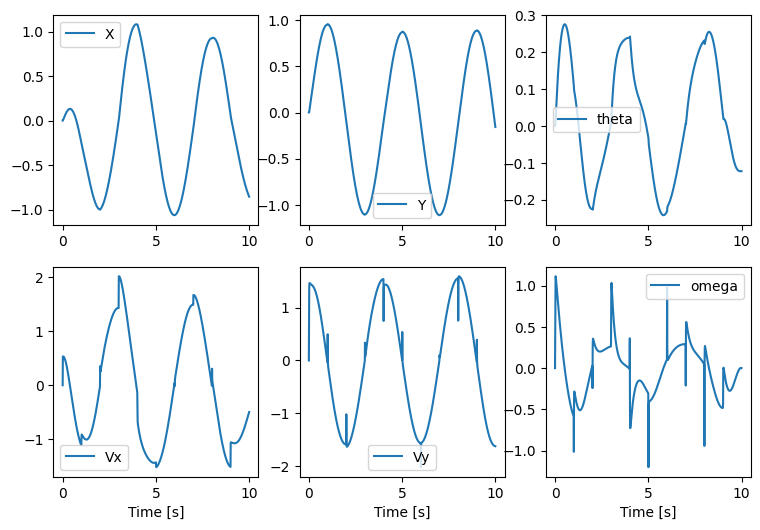

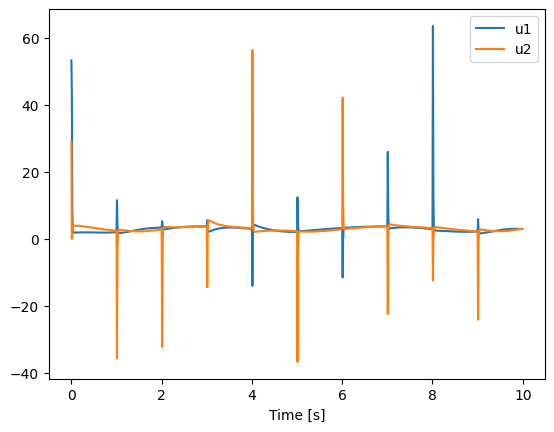

In [72]:
# we can also simulate with perturbations
t, state, u = quadrotor.simulate(z0, dummy_controller, horizon_length, disturbance = True)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

quadrotor.animate_robot(state,u)